# Multiple Regression- Gradient Descent

As the number of features used in regression increases, the matrix operations required by the closed-form solution become computationaly expensive, if not impossible.

<!-- TEASER_END -->

In fact, the computational complexity for the closed-from solution is $$O\left( n^{3}\right)$$ where *n* is the number of features. In cases with many features, an optimization algorithm is needed instead, and gradient descent is one of the most commonly used.

In gradient descent, estimations of coeffients of a model equation are iteratively updated based upon the current gradient of the function, descending a loss function until the gradient is near zero. ![Visualization of gradient descent optimization](/images/gradient.png)

For multiple linear regression the cost function is the residual sum of squares (RSS) of the model when applied to the test set.

With true outputs **y**, feature coefficient vector **w**(*t*) at iteration *t*, and learning rate *ƞ*, the updated coeffiencents are given by: 


$$\mathbf w^{\left( t+1\right)}=\mathbf w^{\left( t\right)}-\eta \nabla RSS\left( \mathbf w^{\left( t\right)}\right)$$ With data by feature matrix **H**, $$\nabla RSS\left( \mathbf w^{\left( t\right)}\right) = \nabla \left[\left( \mathbf y-\mathbf H\mathbf w^{\left( t\right)}\right)^{T}\left( \mathbf y - \mathbf H \mathbf w^{\left( t\right)}\right)\right]$$
$$ = -2 \mathbf H^{T}\left( \mathbf y - \mathbf H\mathbf w^{\left( t\right)}\right)$$
This yields the final derivation:
$$\mathbf w^{\left( t+1\right)}=\mathbf w^{\left( t\right)}+2\eta\left[\mathbf H^{T}\left(\mathbf y - \mathbf H\mathbf w^{\left( t\right)}\right)\right]$$

Here is some pseudocode for the algorithm to translate from mathese into codespeak:

```

initialize coefficients

while gradient_magnitude >= tolerance:
    for each feature:
        updated_feature_coefficient = feature_coefficient - eta*feature_derivative
return coefficients
```

Now for the Python implementation:

First import libraries and create functions to make predictions based on the model coefficients and yeild the errors based upon those predictions.

In [1]:
import math
import random
import numpy as np

def predict_output(feature_matrix, coefficients):
    ''' Returns an array of predictions
    
    inputs - 
        feature_matrix - 2-D array of dimensions data points by features
        coefficients - 1-D array of estimated feature coefficients
        
    output - 1-D array of predictions
    '''
    predictions = np.dot(feature_matrix, coefficients)
    return predictions

Next, a function to compute the partial derivative for each feature:

In [2]:
def feature_derivative(errors, feature):
    derivative = 2*np.dot(errors, feature)
    return(derivative)

Now we are ready to write the main function:

In [3]:
def gradient_descent_regression(H, y, initial_coefficients, eta, epsilon, max_iterations=10000):
    ''' Returns coefficients for multiple linear regression.
    
    inputs - 
        H - 2-D array of dimensions data points by features
        y - 1-D array of true output
        initial_coefficients - 1-D array of initial coefficients
        eta - float, the step size eta
        epsilon - float, the tolerance at which the algorithm will terminate
        max_iterations - int, tells the program when to terminate
    
    output - 1-D array of estimated coefficients
    '''
    converged = False
    w = initial_coefficients
    iteration = 0
    while not converged:
        if iteration > max_iterations:
            print 'Exceeded max iterations\nCoefficients: ', w
            return w
        pred = predict_output(H, w)
        residuals = pred-y
        gradient_sum_squares = 0
        for i in range(len(w)):
            partial = feature_derivative(residuals, H[:, i])
            gradient_sum_squares += partial**2
            w[i] = w[i] - eta*partial
        gradient_magnitude = math.sqrt(gradient_sum_squares)
        if gradient_magnitude < epsilon:
            converged = True
        iteration += 1
    print w
    return w

Let's test it out! I'll use a noisy sine function and try to fit a third degree polynomial.

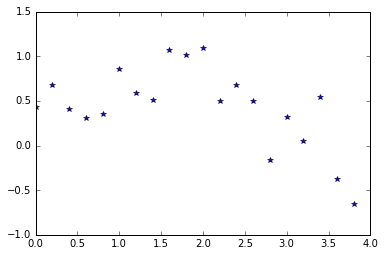

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
random.seed(1)
n = 20
pts = [x/5. for x in xrange(n)]
X = np.array(pts)
y = np.array([math.sin(x) for x in pts]) + [random.gauss(0,1.0/3.0) for i in xrange(n)]

plt.plot(X, y, '*')

Now to build the feature matrix with one column for each feature. The regression model will return coefficients **w** that minimize the RSS of the model: $$\hat {y}_{i}=w_{0}+w_{1}x_{i}+w_{2}x^{2}_{i}+w_{3}x_{i}^{3}$$

In [5]:
feature_matrix = np.zeros(n*4)
feature_matrix.shape = (n, 4)
feature_matrix[:,0] = 1
feature_matrix[:,1] = X
feature_matrix[:,2] = X**2
feature_matrix[:,3] = X**3

Now to run the regression. Choosing *ƞ* and *ɛ* is a bit of an art. Choosing a small learning rate will lead to a more precise answer, but if the learning rate is too small, the optimization may take a very long time. Conversely, a larger learning rate will converge faster, but if it's too large, the algorithm may overshoot the minimum and never converge, bouncing around the sides of the bowl into eternity. Setting a max number of iterations will avoid potential infinite loops. 

A reasonable epsilon depends on how noisy the data is and how flexible the model is. Starting relatively high and stepping down will increase the precision of the model without running into too many iteration overflows.

For *ƞ*, there are some interesting techniques for adjusting the parameter as the algorithm approaches the optimal solution. Check out [Adagrad](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#AdaGrad) for an example.

Initializing the coefficients can also be done intelligently, but I'll just set them all to 0 here.

In [6]:
initial_coefficients = np.array([0., 0., 0., 0.])
coef = gradient_descent_regression(feature_matrix, y, initial_coefficients, 6e-5, 1)

[ 0.30764503  0.20667802  0.14696395 -0.07014237]


Let's see how we did.

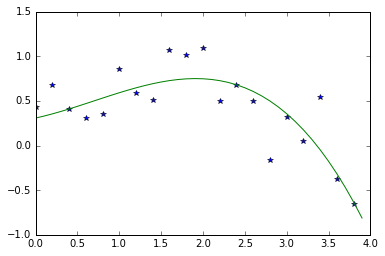

In [7]:
model_prediction_X = np.array([x/10. for x in range(40)])
model_prediction_matrix = np.zeros(40*4)
model_prediction_matrix.shape = (40, 4)
model_prediction_matrix[:,0] = 1
model_prediction_matrix[:,1] = model_prediction_X
model_prediction_matrix[:,2] = model_prediction_X**2
model_prediction_matrix[:,3] = model_prediction_X**3

predictions = predict_output(model_prediction_matrix, coef)

plt.plot(X, y, '*', model_prediction_X, predictions, '-')

Not too bad. To improve the model, we could try adding or subtracting features, or adding a regularization term to the cost function.